# CS 171 PS 1
# Due: Wednesday, October 9, 2019 @ 11:59pm

## Read *all* cells carefully and answer all parts (both text and missing code)

### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
Your Name (submitter): Yulin Zhang<br>
Your student ID (submitter): 862125665
    
<hr>

Collaborators, optional (they do *not* need to submit their own)

Collaborator 1 name:<br>
Collaborator 1 student ID:

Collaborator 2 name:<br>
Collaborator 2 student ID:

(max of 2 collaborators)
</div>


## Overview

This problem set deals with IMDB review data (from [here](https://ai.stanford.edu/~amaas/data/sentiment/)).  This dataset consists of reviews with either poor (<=4) or good (>=7) ratings.  The cells below load in training and testing data.  For each point, there are 1000 features, corresponding to the 1000 most common words in the reviews.  Each feature's value is from 0 to 6, with 0 indicating that the word did not appear, 1 indicating the word appeared once, 2 indicating the word appears between 2 and 4 times, and so on.  The corresponding y values are 0 for a poor rating and 1 for a good rating.

**We will treat these features as categorical** (That is, each feature's value is not treated as numeric, but as 7 different values that happen to be encoded using integers.)

In [9]:
## THESE ARE THE ONLY LIBRARIES YOU MAY IMPORT!!
import numpy as np
import matplotlib.pyplot as plt

# below line just to make figures larger
plt.rcParams["figure.figsize"] = (20,10)


In [10]:
def loaddata(fname):
    M = np.loadtxt(fname,dtype=float)
    np.random.shuffle(M)
    X = M[:,1:]
    threshs = [0,1,2,4,8,16,32,1024]
    for (i,(t1,t2)) in enumerate(zip(threshs[:-1],threshs[1:])):
        X[(X>t1) & (X<=t2)] = i
    Y = M[:,0]
    Y[Y<=0] = 0 # data is originally +1, -1
    return (X,Y)

In [11]:
(trainX,trainY) = loaddata('train.txt')
(testX,testY) = loaddata('test.txt')

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 1:</font> <font size=+1>(5 points)</font>
    
In the cell below, plot a grid of histograms (5 columns, 4 rows)
Each histogram should be the distribution of a different feature (so you will be plotting just the first 20 features).  The histograms should have two sets of bars (each in their own color): ones for examples from class 0 and one for examples from class 1.  You want side-by-side histograms, each with 7 bars (for 14 bars in two colors). Be sure to give a title to each plot with the feature number.
    
Hint: look up pyplot's [subplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html) and [hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) functions

</div>

<Figure size 1440x720 with 0 Axes>

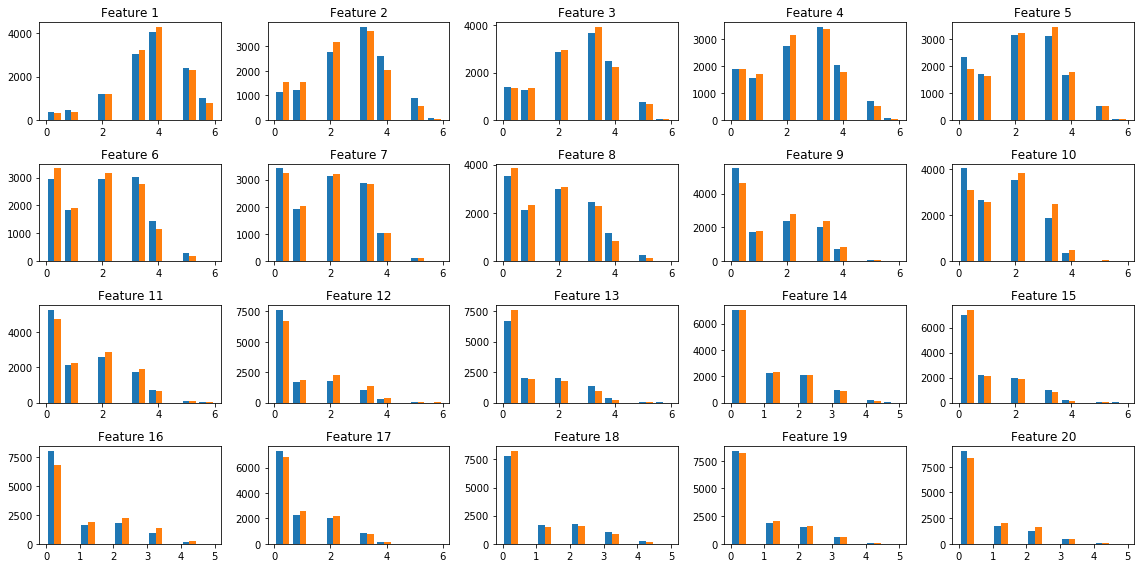

In [12]:
# YOUR CODE HERE!

first20X = trainX[: , 0:20]
first20Xgood = np.zeros((1, 20))
first20Xpoor = np.zeros((1, 20))

for index, value in enumerate(trainY):
    if value == 1:
        first20Xgood = np.append(first20Xgood, [first20X[index]], axis=0)
    else:
        first20Xpoor = np.append(first20Xpoor, [first20X[index]], axis=0)
first20Xgood = np.delete(first20Xgood, (0), axis=0)
first20Xpoor = np.delete(first20Xpoor, (0), axis=0)

bins=[0, 1, 2, 3, 4, 5, 6, 7]
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=10, hspace=10)
fig, axes = plt.subplots(4, 5, figsize=(16, 8))

temp_array = np.arange(1,21)
temp_array = np.char.mod('%d', temp_array)
titles = []
for index, values in np.ndenumerate(temp_array):
    titles.append('Feature '+ temp_array[index])
       
axes = axes.ravel()
for index, ax in enumerate(axes):
    ax.hist([first20Xgood[:,index], first20Xpoor[:,index]])
    ax.set_title(titles[index])

plt.tight_layout()

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 2:</font> <font size=+1>(5 points)</font>
    
For the 20 features above, based on the histograms you plotted, which are the most helpful three (or so) features for classifying this dataset?  <b>WHY?</b>
</div>
    

Feature 9, feature 10 and maybe feature 16. These features tend to be associated with "good" or "poor" when the frequency of appearance is low or high respectively. For example, when Feature 10 does not appear frequently, the review is more likely to be poor, whereas when it appears more often, the reviews is more likely to be "good".

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 3:</font> <font size=+1>(12 points)</font>
        
Complete the two functions in the two cells below.

The first trains/learns a naive Bayes classifier.  The second predicts the classes for a set of examples based on the model learned.
    
Hint:  Test your code on the example from the slides in class.  You'll need to generate the data matrix yourself and your own testing examples.
    
Hint 2: You will have to deal with counts that are 0.  Leaving them as zero will result in 0 probabilities that will cause problems.  A standard way to handle this is to add 1 to all counts.  For frequent feature values, it does not change things much.  For infrequent values, it keeps them away from 0 and admits that they might happen more often.
</div>

In [22]:
def learnnb(X,Y):
    # X is shape (m,n) (m data points, each with n features).  It has integer values from 0 to maxfeatval (inclusive)
    # Y is shape (m,) (m data points).  It has values of either 0 or 1 (class "0" or class "1")
    maxfeatval = X.max().max()
    
    # this function is to return a pair (priorp,condp)
    # where priorp is of shape (2,) and has the prior probability of each of the two classes
    # and  condp is of shape (n,maxfeatval+1,2) and has the conditional probabilities for the naive Bayes classifier
    
    ## YOUR CODE HERE
    pgood = np.count_nonzero(Y == 1)/Y.size
    ppoor = np.count_nonzero(Y == 0)/Y.size
    priorp = [pgood, ppoor]
    
    # initialize a 3d array
    condp = np.zeros((1, int(maxfeatval)+1, 2))
    #iterate over the transposed of training set
    for column in X.T:
        # initialize a "layer" of 3d array
        temp = [[[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0]]]
        i = 0
        col = column
        class0 = np.zeros((7))
        class1 = np.zeros((7))
        for i in range(7):
            class0[i] =+ 1
            class1[i] =+ 1    # deal with counts that are 0

        #count feature appearances 
        i = 0
        for row in col:
            if col[i] == 0:
                if Y[i] == 0:
                    class0[0] += 1
                else: class1[0] += 1
                i += 1
            elif col[i] == 1:
                if Y[i] == 0:
                    class0[1] += 1
                else: class1[1] += 1
                i += 1
            elif col[i] == 2:
                if Y[i] == 0:
                    class0[2] += 1
                else: class1[2] += 1
                i += 1
            elif col[i] == 3:
                if Y[i] == 0:
                    class0[3] += 1
                else: class1[3] += 1
                i += 1
            elif col[i] == 4:
                if Y[i] == 0:
                    class0[4] += 1
                else: class1[4] += 1
                i += 1
            elif col[i] == 5:
                if Y[i] == 0:
                    class0[5] += 1
                else: class1[5] += 1
                i += 1
            else:
                if Y[i] == 0:
                    class0[6] += 1
                else: class1[6] += 1
                i += 1

        # calculate probability
        class0_sum = np.sum(class0)
        class1_sum = np.sum(class1)
        for i in range(7):
            class0[i] = class0[i] / class0_sum
            class1[i] = class1[i] / class1_sum

        for i in range(7):
            for j in range(2):
                if j == 0:
                    temp[0][i][j] = class0[i]
                else:
                    temp[0][i][j] = class1[i]

        condp = np.append(condp,temp, axis = 0)

    condp = np.delete(condp, (0), axis=0)
    
    return (priorp, condp)

In [23]:
def prednb(X,model):
    # X is of shape (m,n) (m data points, each with n features).
    # model is the pair (priorp,condp), as returned from learnnb
    # should return something of shape (m,) which is an array of 0s and 1s, indicating
    # the predicted (most probable under NB) class for each of the examples in X
    (priorp,condp) = model

    ## YOUR CODE HERE
    (priorp, condp) = learnnb(trainX,trainY)
    priorpgood = priorp[0]
    priorppoor = priorp[1]

    score = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        pgood = 0
        ppoor = 0
        for j in range(condp.shape[0]):
            ppoor += np.log(condp[j][int(X[i][j])][0])
            pgood += np.log(condp[j][int(X[i][j])][1])
        ppoor += np.log(priorppoor)
        pgood += np.log(priorpgood)
        if ppoor < pgood:
            score[i] = 1
        else:
            score[i] = 0
    return score

<div style="color: #000000;background-color: #FFFFEE">
<font size=+2>Question 4:</font> <font size=+1>(3 points)</font>
The code below trains a naive Bayes classifier and then tests it on the testing examples and reports the error rate.
    
Run the code.  [note, just because your code runs on this example, does not mean it is correct; for instance, both classes are equally likely a priori in this example, which is not always true.]
    
Then answer the question, "<b>Is this error rate good?  How do you know?</b>"
</div>


In [24]:
def errorrate(predY,trueY):
    if len(predY.shape)>1:
        predY = predY[:,0]
    if len(trueY.shape)>1:
        trueY = trueY[:,0]
    return (predY!=trueY).mean()

model = learnnb(trainX,trainY)
predY = prednb(testX,model)
print(errorrate(predY,testY))

0.27532


YOUR ANSWER HERE

I think an error rate of less than 10% is needed to be considered good.